IMPORT LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
from google.colab import files
import io
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

LOAD DATASET

In [ ]:
uploaded = files.upload()

Saving apheresis-dummy-data (1).csv to apheresis-dummy-data (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['apheresis-dummy-data (1).csv']))
print(df)

      age  sex  weight  diseaseType  diseaseStatus  numChemos  \
0      61    0    43.5            1              2          2   
1      41    0    49.2            2              1          3   
2      37    1    40.0            2              1          3   
3      63    0    67.0            2              2          1   
4      36    1    54.9            1              2          3   
...   ...  ...     ...          ...            ...        ...   
9995   66    0    48.4            3              1          2   
9996   48    1    51.9            2              2          1   
9997   50    1    90.7            1              1          3   
9998   69    1    86.7            1              2          3   
9999   50    1    41.5            3              2          2   

      myelotoxicAgentUse  harvestRegimen  dayMinusOneWhiteBloodCells  \
0                      0               2                        66.5   
1                      1               1                        25.4   
2  

In [ ]:
df.shape


(10000, 19)

In [ ]:
df.head()

,age,sex,weight,diseaseType,diseaseStatus,numChemos,myelotoxicAgentUse,harvestRegimen,dayMinusOneWhiteBloodCells,dayMinusOneNeutrophils,dayMinusOneMonocytes,dayMinusOneMetamyelocytes,dayMinusOneMyelocytes,dayMinusOneHemoglobin,dayMinusOnePlatelets,numAphereses,bloodVolumeProcessed,dayMinus1CD34yield,day0CD34Yield
0,61,0,43.5,1,2,2,0,2,66.5,13.5,3.6,0.5,2.8,10.3,25.8,1,9.3,15.0,9.5
1,41,0,49.2,2,1,3,1,1,25.4,61.4,3.8,1.9,3.0,10.5,16.8,1,12.0,3.8,7.4
2,37,1,40.0,2,1,3,1,2,48.1,63.9,0.8,2.0,0.2,12.5,57.9,1,8.6,20.0,20.1
3,63,0,67.0,2,2,1,1,1,52.9,18.6,7.3,1.1,1.1,10.2,58.1,3,11.9,13.0,23.8
4,36,1,54.9,1,2,3,1,3,16.3,49.7,0.4,1.6,2.5,12.2,35.6,3,11.6,8.4,4.7


In [ ]:
df.tail()

,age,sex,weight,diseaseType,diseaseStatus,numChemos,myelotoxicAgentUse,harvestRegimen,dayMinusOneWhiteBloodCells,dayMinusOneNeutrophils,dayMinusOneMonocytes,dayMinusOneMetamyelocytes,dayMinusOneMyelocytes,dayMinusOneHemoglobin,dayMinusOnePlatelets,numAphereses,bloodVolumeProcessed,dayMinus1CD34yield,day0CD34Yield
9995,66,0,48.4,3,1,2,0,2,55.9,32.1,2.1,1.1,1.0,8.8,16.8,3,14.0,22.0,20.5
9996,48,1,51.9,2,2,1,1,3,38.5,32.1,7.9,0.5,0.6,13.3,51.6,3,14.6,9.5,24.1
9997,50,1,90.7,1,1,3,1,2,69.5,21.5,1.3,0.2,2.1,10.4,46.8,3,11.4,26.8,8.9
9998,69,1,86.7,1,2,3,0,2,40.6,38.0,1.2,0.2,0.7,12.6,68.7,1,13.6,19.4,8.2
9999,50,1,41.5,3,2,2,1,3,41.1,51.3,0.2,1.0,0.9,10.0,0.9,3,6.2,7.5,7.4


In [ ]:
# drop unwanted columns.
df = df.drop(['diseaseType', 'numChemos', 'myelotoxicAgentUse',	'harvestRegimen',	'dayMinusOneWhiteBloodCells',	'dayMinusOneNeutrophils',	'dayMinusOneMonocytes',	'dayMinusOneMetamyelocytes',	'dayMinusOneMyelocytes'	,'dayMinusOneHemoglobin',	'dayMinusOnePlatelets',	'numAphereses',	'bloodVolumeProcessed',	'dayMinus1CD34yield'	 ], axis=1)
df.head()

,age,sex,weight,diseaseStatus,day0CD34Yield
0,61,0,43.5,2,9.5
1,41,0,49.2,1,7.4
2,37,1,40.0,1,20.1
3,63,0,67.0,2,23.8
4,36,1,54.9,2,4.7


In [ ]:
df.describe()

,age,sex,weight,diseaseStatus,day0CD34Yield
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,47.995800,0.505800,64.032110,2.008600,15.083950
std,12.947747,0.499991,18.099718,0.816941,8.690799
min,26.000000,0.000000,33.000000,1.000000,0.000000
25%,37.000000,0.000000,48.200000,1.000000,7.600000
50%,48.000000,1.000000,63.900000,2.000000,15.200000
75%,59.000000,1.000000,79.600000,3.000000,22.500000
max,70.000000,1.000000,96.000000,3.000000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10000 non-null  int64  
 1   sex            10000 non-null  int64  
 2   weight         10000 non-null  float64
 3   diseaseStatus  10000 non-null  int64  
 4   day0CD34Yield  10000 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


DATA EXPLORATION

In [ ]:
df['age'].nunique()

45

In [ ]:
df.groupby(['age'],sort=True)['day0CD34Yield'].sum().nlargest(10)

age
57    3845.2
30    3841.9
37    3759.8
27    3705.9
59    3630.1
36    3587.1
40    3580.8
41    3561.8
58    3546.7
51    3534.3
Name: day0CD34Yield, dtype: float64

In [ ]:
df.groupby(['age', 'sex', 'weight'],sort=True)['day0CD34Yield'].sum().nlargest(10)

age  sex  weight
64   0    35.4      88.0
62   1    71.1      81.5
35   1    46.5      80.7
70   1    50.5      69.8
38   0    41.1      66.4
69   0    71.0      66.3
26   0    51.6      64.3
34   1    33.3      62.2
37   0    65.8      61.9
51   1    91.3      60.1
Name: day0CD34Yield, dtype: float64

CO-ORELATION 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


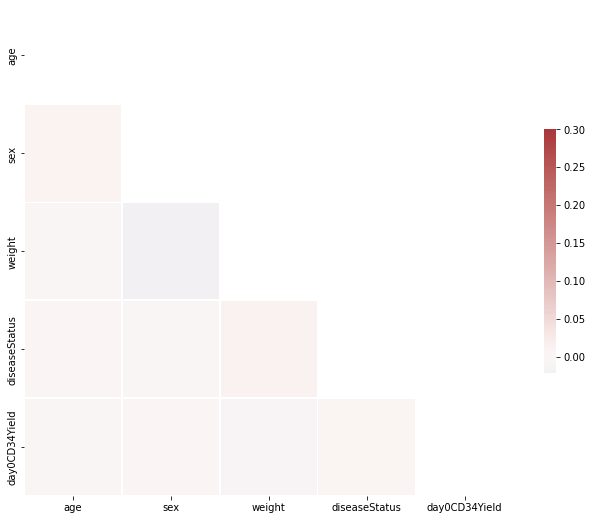

In [ ]:
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_onehot = pd.get_dummies(df, columns=['age',"sex"], prefix = ['age',"sex"])
features=df_onehot.loc[:, df_onehot.columns != 'day0CD34Yield']
label=df['day0CD34Yield']
features.head()

,weight,diseaseStatus,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,...,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,sex_0,sex_1
0,43.5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,49.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,67.0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,54.9,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

MODEL COMPARISON

In [ ]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [ ]:
model_train=list(map(compare_models,models)) 

In [ ]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', -0.022068456754959165]
['RandomForestRegressor', -0.00026964964294395877]
['SVR', 0.00019027669258364632]
['DecisionTreeRegressor', -1.0113714382343177]


In [ ]:
test_data.head()

,diseaseStatus,yield_actual
6252,1,9.8
4684,1,25.3
1731,2,9.4
4742,3,1.2
4521,1,18.3


DECISION TREE ALGORITHM

In [ ]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)


In [ ]:
# Predicting the target values of the test set
pred = model.predict(train_data)


In [ ]:
actualyield=pd.DataFrame(test_labels)["day0CD34Yield"].tolist()


In [ ]:
test_group=df.groupby("age")


In [ ]:
grouped = pd.DataFrame(df.groupby(['age','sex'])['weight'].count())
grouped.columns = ['Value_counts']
grouped

Value_counts
age sex              
26  0             123
    1             107
27  0             120
    1             122
28  0             104
...               ...
68  1             126
69  0             100
    1             122
70  0             103
    1             114

[90 rows x 1 columns]

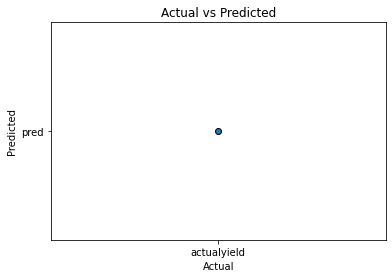

In [ ]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(["actualyield"], ["pred"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()